<a href="https://colab.research.google.com/github/meskeremg/FinalCapstone/blob/main/Step_4_3_NLP_Book_Recommendation_Modeling_with_SBERT_Sentence_Embeddings_Meskerem_Goshime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 4-3 NLP Book Recommendation System
# Model 3 - SBERT Sentence Embeddings and Cosine Similarity

Amazon Books Reviews Data data source: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv This is a rich dataset for Natural Language Processing containing 3,000,000 text reviews from users as well as text descriptions and categories for 212,403 books. Therefore it is ideal for text analysis.

# Importing libraries and reading the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
fileDownloaded = drive.CreateFile({'id':'1dnURk-tdodpKuv-3Ic92ELyNoQLs9tLA'})
fileDownloaded.GetContentFile('books_after_preprocessing.csv')

In [7]:
books = pd.read_csv('books_after_preprocessing.csv')

In [8]:
books.head(3)

,index,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
0,74190,and poetry is born russian classical poetry,4.0,1.0,['Aleksandr Sergeevich Pushkin'],1984.0,russian poetry selection russian poem russian ...
1,80644,and still king,4.0,1.0,['Keith Checkley'],2012.0,business economics nothing provides clearer pi...
2,31352,dancers in mourning,4.5,8.0,['Margery Allingham'],2015.0,fiction murder take center stage songanddance ...


# Taking a subset of the data by selecting the books which received more than 10 reviews

I am taking a subset of the book data to preform Sentence Embeddings and Cosine Similarity. The full dataset would be too large to process.

In [9]:
books_sm_10 = books[books['review/score_Count'] > 10]
books_sm_10.head(3)

,index,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
30,95768,1 is one,4.866667,30.0,['Tasha Tudor'],2015.0,juvenile nonfiction rhyming verse present numb...
34,76202,1 ragged ridge road,4.277778,18.0,"['Leonard Foglia', 'David Richards']",1998.0,fiction estranged husband carol robbins young ...
36,110134,10 button book,3.142857,28.0,['William Accorsi'],1999.0,juvenile nonfiction verse introduce number one...


In [10]:
books_sm_10 = books_sm_10.reset_index(drop=True)
books_sm_10 = books_sm_10.drop(columns='index')
books_sm_10.head(3)


,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
0,1 is one,4.866667,30.0,['Tasha Tudor'],2015.0,juvenile nonfiction rhyming verse present numb...
1,1 ragged ridge road,4.277778,18.0,"['Leonard Foglia', 'David Richards']",1998.0,fiction estranged husband carol robbins young ...
2,10 button book,3.142857,28.0,['William Accorsi'],1999.0,juvenile nonfiction verse introduce number one...


In [11]:
books_sm_10.shape

(29560, 6)

# Cosine Similarity using Word Embeddings

In [12]:
# this took 13 seconds to run using GPU and Hi RAM.
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# source: https://www.sbert.net/docs/usage/semantic_textual_similarity.html
# using pretrained SentenceTransformer model
# This took 23 seconds using GPU and Hi RAM in Google Colab Pro.

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences
sentences = books_sm_10['description_categories'].values

#Compute embeddings
embeddings = model.encode(sentences, convert_to_numpy=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

In [14]:
cosine_scores

tensor([[1.0000, 0.1183, 0.5271,  ..., 0.1800, 0.2950, 0.0608],
        [0.1183, 1.0000, 0.1760,  ..., 0.0393, 0.3236, 0.1506],
        [0.5271, 0.1760, 1.0000,  ..., 0.1901, 0.2620, 0.0790],
        ...,
        [0.1800, 0.0393, 0.1901,  ..., 1.0000, 0.3124, 0.0623],
        [0.2950, 0.3236, 0.2620,  ..., 0.3124, 1.0000, 0.4192],
        [0.0608, 0.1506, 0.0790,  ..., 0.0623, 0.4192, 1.0000]])

In [15]:
cosine_scores[0]

tensor([1.0000, 0.1183, 0.5271,  ..., 0.1800, 0.2950, 0.0608])

# Finding the 5 most similar books to the book in 0 index place

In [16]:
sim_0 = pd.DataFrame(cosine_scores[0], columns=['sim']).sort_values(by='sim', ascending=False)
sim_0.reset_index(inplace = True)
sim_0.head()

,index,sim
0,0,1.000000
1,756,0.772923
2,10572,0.743990
3,10571,0.739862
4,17176,0.721054


In [18]:
print('Chosen book: ', books_sm_10['Title'][0], '\n')
print('Similar books: ')
for i in range(1,6):
  indexes = int(sim_0.loc[i]['index'])
  print(indexes, books_sm_10['Title'][indexes])
  

Chosen book:  1 is one 

Similar books: 
756 a pinky is a baby mouse and other baby animal names pinky baby
10572 i spy little book
10571 i spy 4 picture riddle books school reader collection lvl 1 scholastic reader collection
17176 read to your bunny max  ruby
21379 the christian mother goose book of nursery rhymes


# Making a Function which finds similar books to a given title

In [19]:
def find_similar(title, df, df_col, sims):
    index_val = df[df_col == title].index
    sim = sims[index_val]
    sim = pd.DataFrame(sim).T
    sim.columns = ['sim']
    sim = sim.sort_values(by='sim', ascending = False)
    sim = sim.reset_index()

    print('Chosen book: ', title)
    print('Similar books: ')

    for i in range(1,6):
        indexes = int(sim.loc[i]['index'])
        print(i, '. ', df_col[indexes])


In [42]:
def find_similar(title):
    index_val = books_sm_10[books_sm_10['Title'] == title].index
    sim = cosine_scores[index_val]
    sim = pd.DataFrame(sim).T
    sim.columns = ['sim']
    sim = sim.sort_values(by='sim', ascending = False)
    sim = sim.reset_index()

    print('Chosen book: ')
    print('Title: ', title)
    print('Description: ', books_sm_10['description_categories'][index_val].values, '\n')
    print('Similar books: ')

    for i in range(1,6):
        indexes = int(sim.loc[i]['index'])
        print(i, '. ', 'Title: ', books_sm_10['Title'][indexes])
        print('    ', 'Description: ', books_sm_10['description_categories'][indexes])

# Example Recommendations with the same books I used to test Model 1 and Model 2

note: please see recommendations for **1 is one** above

In [46]:
title1 = '1 is one'
find_similar(title1)

Chosen book: 
Title:  1 is one
Description:  ['juvenile nonfiction rhyming verse present number one twenty illustration animal flower child'] 

Similar books: 
1 .  Title:  a pinky is a baby mouse and other baby animal names pinky baby
     Description:  juvenile nonfiction rhyming text explains different name various baby animal known
2 .  Title:  i spy little book
     Description:  juvenile nonfiction rhyming verse invite reader find hidden object photograph
3 .  Title:  i spy 4 picture riddle books school reader collection lvl 1 scholastic reader collection
     Description:  juvenile nonfiction rhyming verse ask reader find hidden object photograph
4 .  Title:  read to your bunny max  ruby
     Description:  juvenile fiction brief rhyming text illustration tell happens parent child share twenty minute day reading board page
5 .  Title:  the christian mother goose book of nursery rhymes
     Description:  juvenile fiction collection traditional nursery rhyme rewritten emphasize chr

In [38]:
title2 = 'spanish stepbystep'
find_similar(title2)

Chosen book: 
Title:  spanish stepbystep
Description:  ['foreign language study proven grammarbased approach give real mastery spanish language use advanced spanish step step progressive grammarbased approach conquer intermediate advanced spanishlanguage topic stepbystep approach give real confidence tool need achieve high spanish proficiency youll get quick review key grammar basic move advanced topic need true mastery language complete coverage verb tense beyond present past irregular verb sentence structure part speech book give thorough overview advanced grammar topic also introduces hundred new vocabulary word reinforced reading put new term everyday context'] 

Similar books: 
1 .  Title:  fundamental spanish
     Description:  education fundamental spanish clear concise grammar book teacher beginner intermediate selflearners book structured chapter becomes base next lesson understood becomes basis next sequence learning orderly logical clear ton written oral exercise facilitate 

In [39]:
title3 = 'to kill a mockingbird'
find_similar(title3)

Chosen book: 
Title:  to kill a mockingbird
Description:  ['fiction voted america bestloved novel pbs great american read harper lee pulitzer prizewinning masterwork honor injustice deep southand heroism one man face blind violent hatred one cherished story time kill mockingbird translated forty language sold forty million copy worldwide served basis enormously popular motion picture voted one best novel twentieth century librarian across country gripping heartwrenching wholly remarkable tale comingofage south poisoned virulent prejudice view world great beauty savage inequity eye young girl fathera crusading local lawyerrisks everything defend black man unjustly accused terrible crime'] 

Similar books: 
1 .  Title:  to kill a mocking bird
     Description:  drama harper lee classic novel lawyer deep south defending black man charged rape white girl one bestloved story time kill mockingbird earned many distinction since original publication pulitzer prize translated forty language sol

# Duplicate Titles

At this point in the project, I noticed that there were duplicate values in the title column with differing capitalization and/or spelling. Therefore, I returned to the Text Preprocessing step and converted all of book titles to small letters and removed duplicates. However, I did not find a good solution for duplicate titles with spelling/wording differences at this time.

# Accuracy Mesasure: Discounted Cumulative Gains
Relevancy Scoring Key:

Most relevant score => 2

Somewhat relevant score => 1

Least relevant score => 0

Methodology: I manually went through the description of the chosen item and the recommended items to determine relevancy value.

DCG (Discounted Cumulative Gains) = Relevancy Score/(LOG(Recommendation Rank+1))

Formula Source: https://towardsdatascience.com/an-exhaustive-list-of-methods-to-evaluate-recommender-systems-a70c05e121de

The SBERT Model outperforms (DCG=54.39) both the Count Vectorizer Model (DCG = 47.63) and the Gensim/Spacy Model (DCG=41.36).

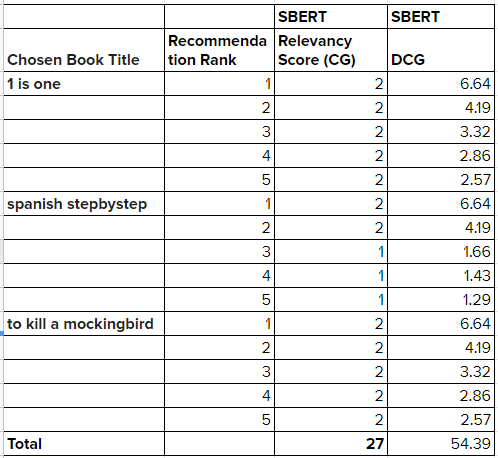

# How about the book reviews data

Initially, my plan was to also to work on the review texts of the reviews data. However, with the reviews data containing more than 2 million rows, it requires an insane amount of memory. Therefore, I am going to base my recommendations on just the categories and description columns of the books data.